In [1]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Import your modules
#---------------------------------------

# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
F10t2 = '/Volumes/Dominic 10tb2/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'

%load_ext autoreload
sys.version

'3.7.4 (default, Aug 13 2019, 15:17:50) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

# Mean gene expression per cell type

In [53]:
from random import randrange

def normalised_gene_expression(maxIk, maxNik):
    # Cell type k
    nc_k = randrange(maxIk) #number of collected cells of type K
    #Loop over each cell of type K
    sumd=0
    for i in range(nc_k):
        nt_ci = randrange(maxNik) #number of total transcripts of cell i (which belongs to cell type k)
        nt_ci_j = randrange(nt_ci) #number of transcripts for gene j, from cell i 
        sumd+=nt_ci_j/nt_ci

    return(sumd/nc_k) #return normalised gene expression for gene j, for cell type k
    

In [55]:
Ukj = normalised_gene_expression(1000,1000) #normalised gene expression for gene j, cell type k
Ukj

0.5076790020685499

# Bayesian inference with PyMC

In [1]:
pip install PyMC

     |████████████████████████████████| 552kB 4.6MB/s eta 0:00:01
     |████████████████████████████████| 33.0MB 1.8MB/s eta 0:00:01
     |████████████████████████████████| 51kB 1.3MB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 2.2MB/s eta 0:00:01
     |████████████████████████████████| 1.4MB 2.5MB/s eta 0:00:01
     |████████████████████████████████| 849kB 469kB/s eta 0:00:01
     |████████████████████████████████| 4.1MB 493kB/s eta 0:00:01
     |████████████████████████████████| 51kB 1.7MB/s eta 0:00:01
     |████████████████████████████████| 256kB 565kB/s eta 0:00:01
  Created wheel for etuples: filename=etuples-0.3.8-cp37-none-any.whl size=12620 sha256=d31adce0497294845817415da33c6a711c066a7bd78546ebec75e12db879e965
  Stored in directory: /Users/dominicburrows/Library/Caches/pip/wheels/26/7d/25/7f7f745aec6ad86e9222e4467d6e1b8c38578609d8f7bf1e27
  Created wheel for cons: filename=cons-0.4.5-cp37-none-any.whl size=9092 sha256=a29b2ca1c6bcb1abce932cf63bf9b03b06f8e2d0f0

In [2]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [42]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

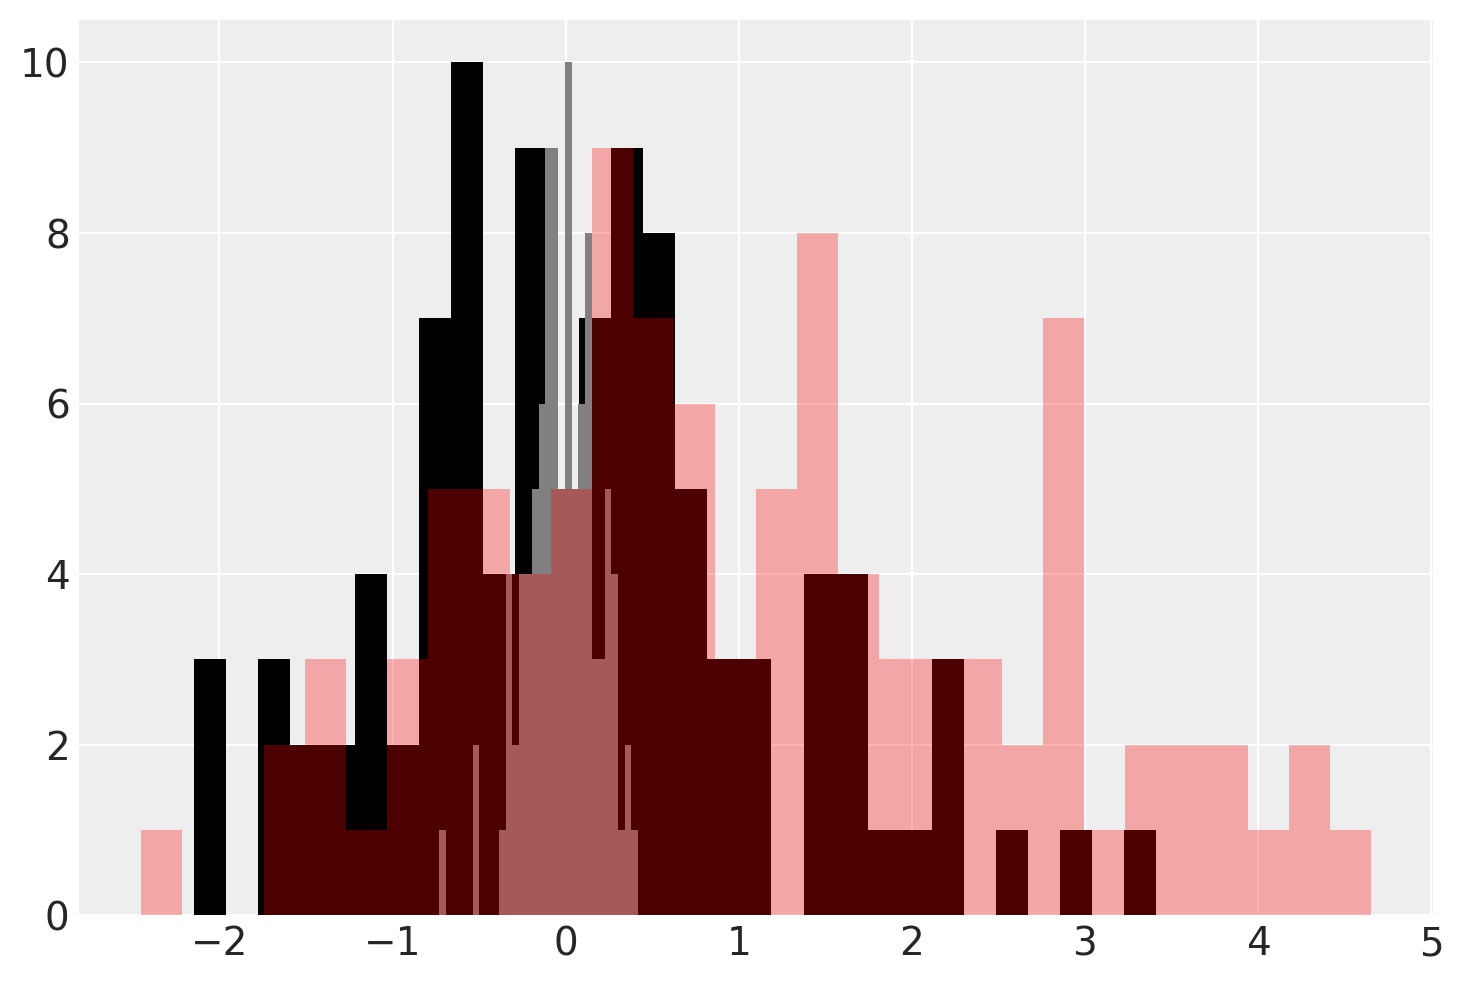

In [35]:
nbins = 30
plt.hist(X1, color='k', bins = nbins)
plt.hist(X2, color='grey', bins = nbins)
plt.hist(Y, color='red', bins = nbins, alpha = 0.3)

plt.show()

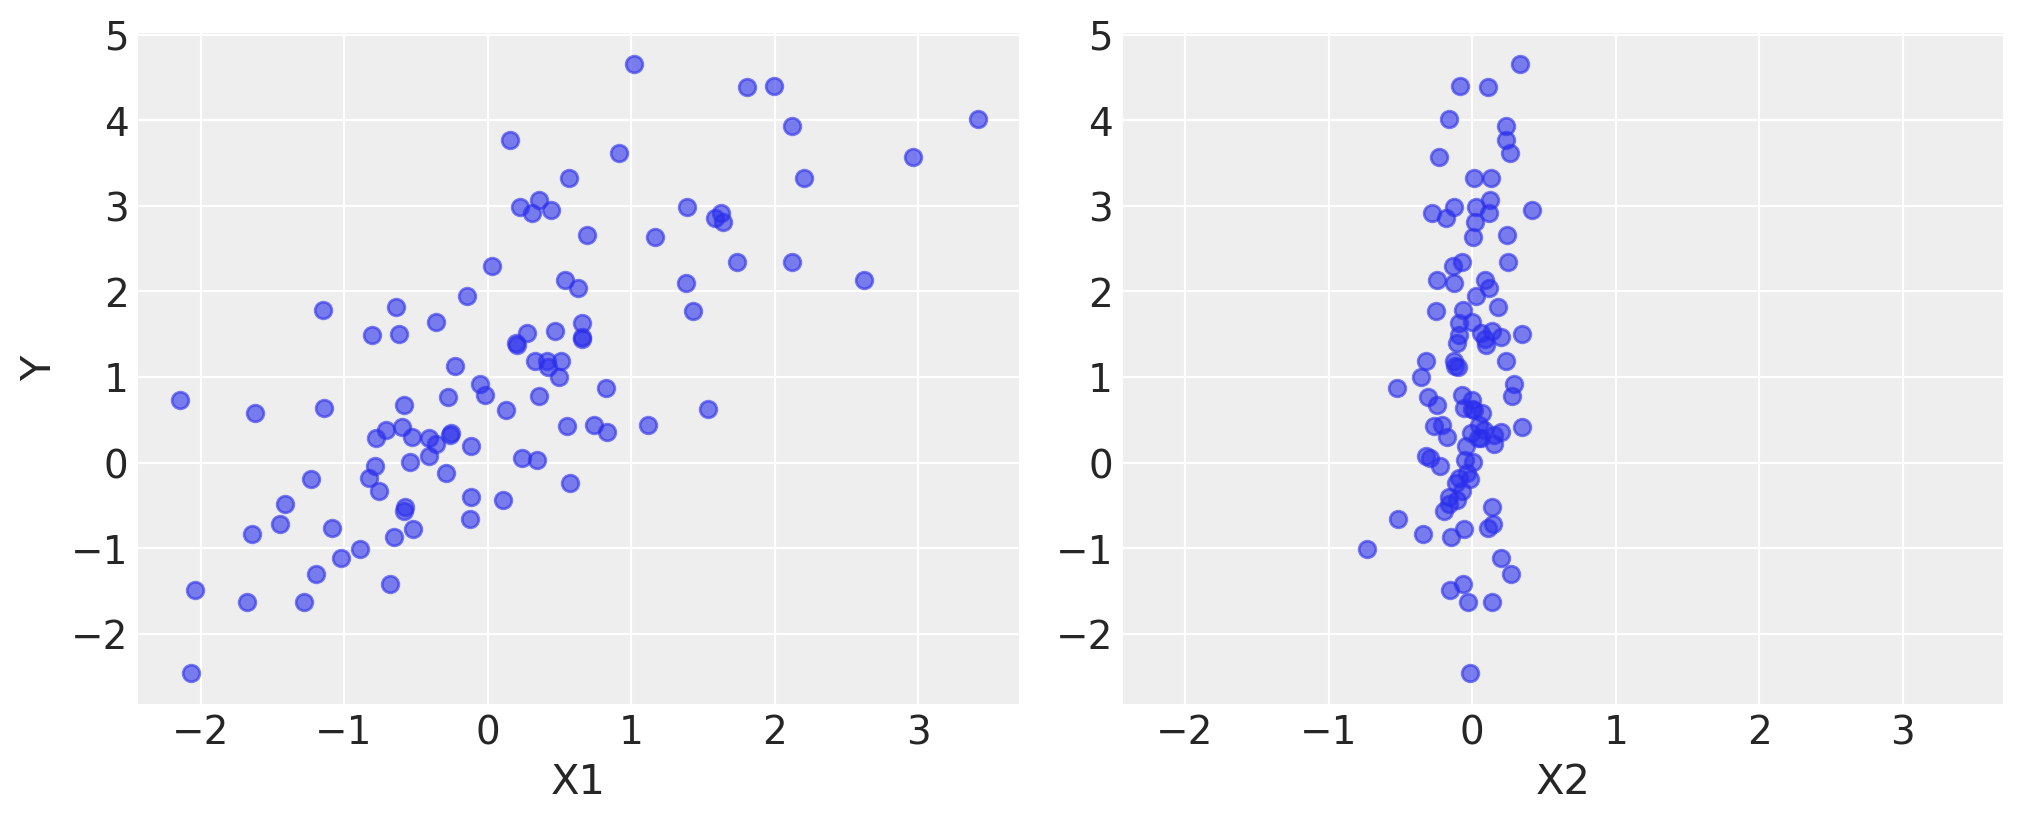

In [36]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");

In [40]:
import pymc as pm
print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v4.1.4


In [41]:
basic_model = pm.Model()

with basic_model: #Creates new model object

    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)